# Stellar identification - a classification task

# import packages

In [5]:
#importing necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor


from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

#Sklearn Evaluation Metrics

from imblearn.over_sampling import SMOTE
from collections import Counter

# since we are dealing with imbalanced data

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Data Pre-processing

## Data Examination

In [2]:
# Read the CSV file into a DataFrame
data = pd.read_csv(r'C:\Users\21264\Downloads\SDSS DR18 for stellar classification\SDSS_data.csv')
pd.set_option('display.max_columns', None) # to display all the columns
data

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,301,3,224,3177,54833,320,9.782383,1.437838,1.253256,1.357382,1.365813,16.92051,44.00229,67.952400,60.256690,71.623370,0.719313,0.729335,0.645534,0.688102,0.692657,19.38800,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,301,3,224,3177,54833,317,1.447653,1.468920,1.256501,1.351257,1.363528,22.80572,58.13137,81.369520,74.220640,83.622310,0.718931,0.736561,0.640508,0.690690,0.691356,19.06916,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,301,3,224,946,52407,153,6.156346,5.484372,4.953245,5.074382,4.858378,25.50407,88.61792,270.065400,188.633600,348.102500,2.736883,2.431270,2.170657,2.230574,2.068773,20.70439,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501,GALAXY
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,301,3,109,617,52072,197,1.552848,1.467646,1.264171,1.349462,1.272607,119.49210,262.50420,384.647400,345.931300,391.795900,0.781456,0.742562,0.653221,0.687849,0.652995,17.27782,16.10380,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400,STAR


In [3]:
print(data.columns)

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')


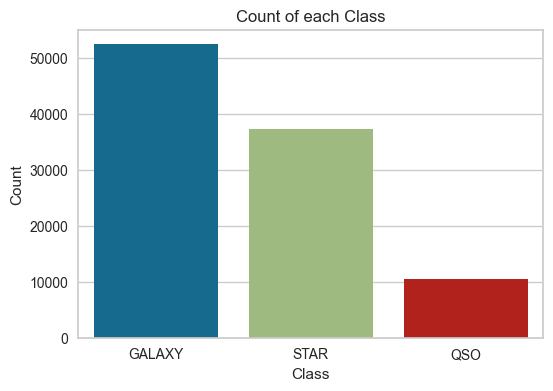

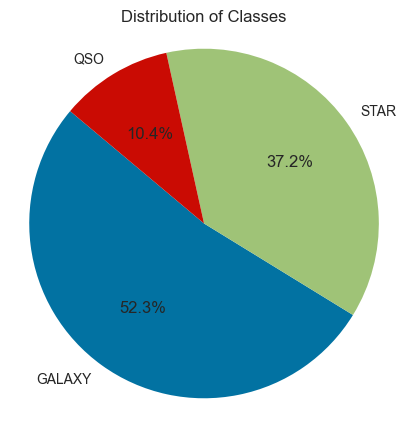

GALAXY    52343
STAR      37232
QSO       10425
Name: class, dtype: int64


In [4]:
#visualizing the data into plots to visualize the count of our different classes
class_column_name = 'class'

# Get the count of each class
class_counts = data[class_column_name].value_counts()

# Create a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x=class_column_name)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of each Class')
plt.show()
# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Classes')
plt.show()

print(class_counts)


In [5]:
data.info()
# As we can see when we run this code, none of the observations have missing data (null or NaN values) in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

In [6]:
data["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in data["class"]]
# assigning the values 0, 1 and 2 to galaxies, stars and quasars respectively

## Outlier detection

In [8]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(data)

In [9]:
x_score = lof.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold = -1.5                                            
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

len(outlier_index)

807

In [10]:
#Eliminating the outlier
data.drop(outlier_index, inplace=True)

## Oversampling the data

In [11]:
x = data.drop(['class'], axis = 1)
y = data.loc[:,'class'].values
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 52074, 1: 36811, 2: 10308})
Resampled dataset shape Counter({0: 52074, 1: 52074, 2: 52074})


## visualizing the balanced data

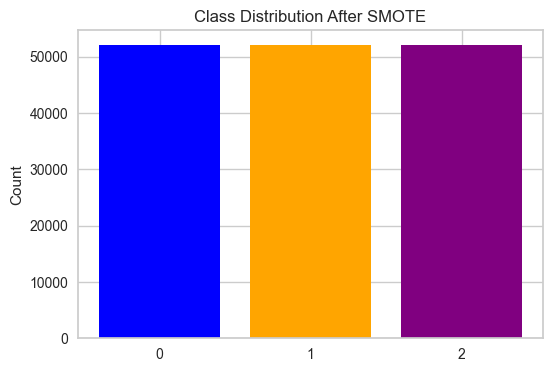

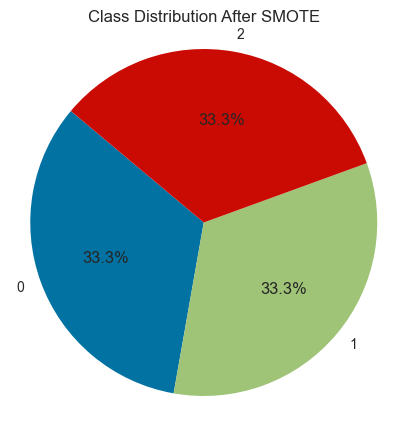

In [12]:

y_resampled_str = [str(label) for label in y]

# Resampled class distribution after SMOTE
resampled_counts = Counter(y_resampled_str)
plt.figure(figsize=(6, 4))
plt.bar(resampled_counts.keys(), resampled_counts.values(), color=[ 'blue', 'orange', 'purple'])
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.show()

# Plotting pie chart for resampled class distribution
plt.figure(figsize=(5, 5))
plt.pie(resampled_counts.values(), labels=resampled_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Class Distribution After SMOTE')
plt.show()

## feature selection

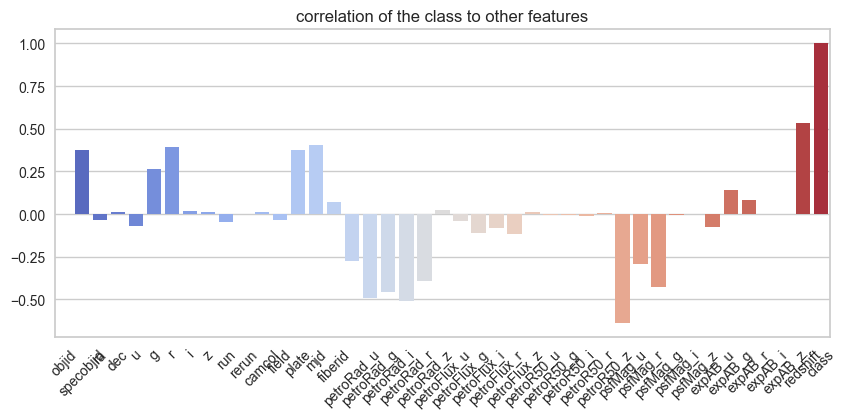

In [13]:
# calculating the correlation to select relevant features
Le = LabelEncoder()
data['class'] = Le.fit_transform(data['class'])
data_corr = data.corrwith(data['class'])
correlation_matrix = data.corr()

plt.figure(figsize=(10, 4))
sns.barplot(x=data_corr.index, y=data_corr.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('correlation of the class to other features')
plt.show()

In [14]:
corr = data.corr()
corr["class"].sort_values()

psfMag_u      -0.640594
petroRad_r    -0.512265
petroRad_g    -0.494341
petroRad_i    -0.459422
psfMag_g      -0.424753
petroRad_z    -0.394598
psfMag_r      -0.294333
petroRad_u    -0.272350
petroFlux_z   -0.114900
petroFlux_i   -0.110024
petroFlux_r   -0.084132
expAB_u       -0.075553
u             -0.072217
run           -0.046808
petroFlux_g   -0.042004
field         -0.036943
ra            -0.033009
petroR50_r    -0.009311
petroR50_g    -0.006957
psfMag_i      -0.006159
petroR50_i    -0.005883
psfMag_z      -0.001210
expAB_z        0.001411
expAB_i        0.003104
petroR50_z     0.007139
dec            0.012399
petroR50_u     0.013120
z              0.013334
camcol         0.014669
i              0.019810
petroFlux_u    0.023584
fiberid        0.073572
expAB_r        0.085246
expAB_g        0.139330
g              0.263630
plate          0.374470
specobjid      0.374506
r              0.391623
mjd            0.404705
redshift       0.534421
class          1.000000
objid           

In [15]:
data = data.drop(["specobjid","plate", "mjd", "fiberid"], axis = 1)

# Model building

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.993


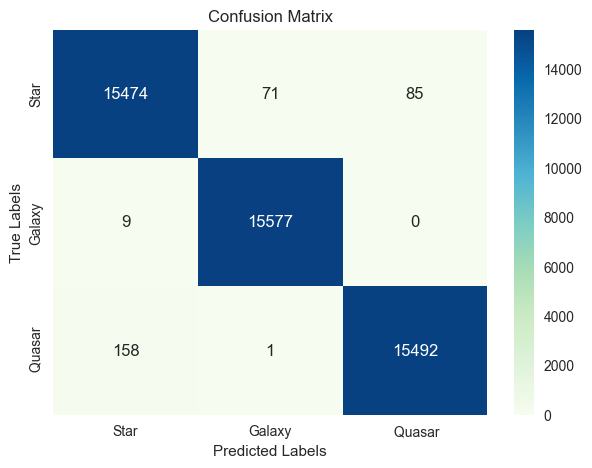

In [18]:
classes = ['Star', 'Galaxy', ' Quasar']

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="GnBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# to get the hyperparameter
num_trees = r_forest.n_estimators

print("Number of Trees in the Random Forest Classifier:", num_trees)

Number of Trees in the Random Forest Classifier: 100


## classification report

In [20]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15630
           1       1.00      1.00      1.00     15586
           2       0.99      0.99      0.99     15651

    accuracy                           0.99     46867
   macro avg       0.99      0.99      0.99     46867
weighted avg       0.99      0.99      0.99     46867



## cross-validation to double check the performance of the model

In [89]:
cv_scores = cross_val_score(r_forest, x, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = np.mean(cv_scores)
print("Average cross-validation score:", average_cv_score)

Cross-validation scores: [0.98588574 0.99443111 0.99519908 0.99507105 0.96559339]
Average cross-validation score: 0.9872360752986129


## class prediction error

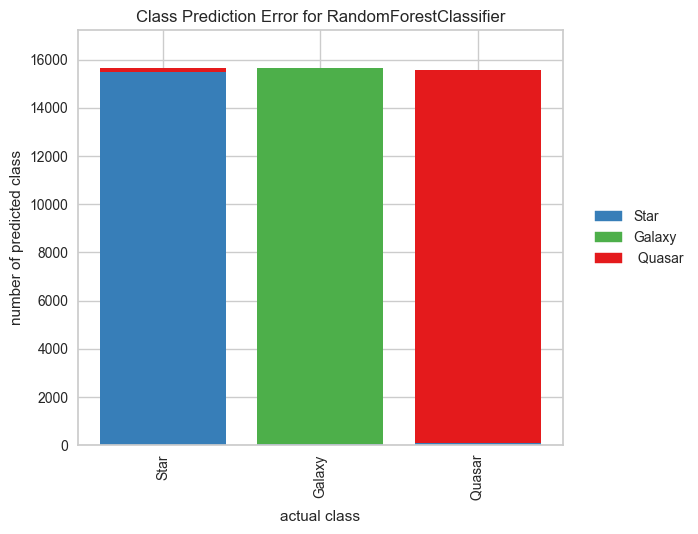

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [21]:
visualizer = ClassPredictionError(r_forest, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)        
visualizer.show()   

## Visualizing the ROC curve 

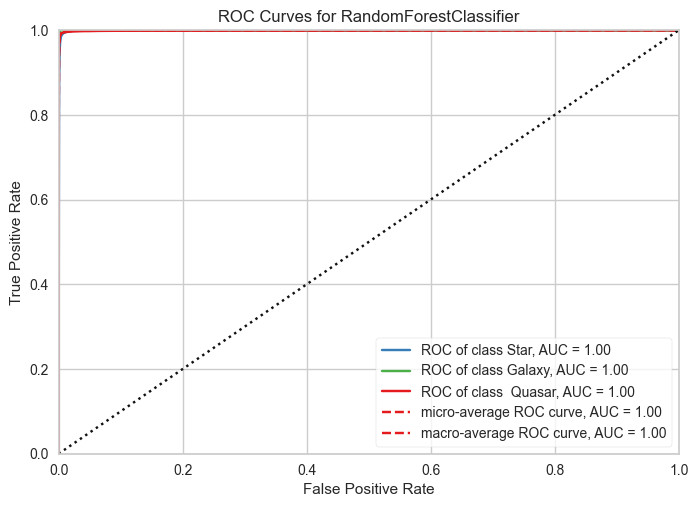

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [95]:
visualizer = ROCAUC(r_forest, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)    # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()    # Finalize and render the figure

# Stellar localization - a regression task

## feature selection

In [7]:
reg_df = pd.read_csv(r'C:\Users\21264\Downloads\SDSS DR18 for stellar classification\SDSS_data.csv')
pd.set_option('display.max_columns', None) # to display all the columns
reg_df

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,301,3,224,3177,54833,320,9.782383,1.437838,1.253256,1.357382,1.365813,16.92051,44.00229,67.952400,60.256690,71.623370,0.719313,0.729335,0.645534,0.688102,0.692657,19.38800,18.01472,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,301,3,224,3177,54833,317,1.447653,1.468920,1.256501,1.351257,1.363528,22.80572,58.13137,81.369520,74.220640,83.622310,0.718931,0.736561,0.640508,0.690690,0.691356,19.06916,17.79733,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,301,3,224,946,52407,153,6.156346,5.484372,4.953245,5.074382,4.858378,25.50407,88.61792,270.065400,188.633600,348.102500,2.736883,2.431270,2.170657,2.230574,2.068773,20.70439,18.14792,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501,GALAXY
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,301,3,109,617,52072,197,1.552848,1.467646,1.264171,1.349462,1.272607,119.49210,262.50420,384.647400,345.931300,391.795900,0.781456,0.742562,0.653221,0.687849,0.652995,17.27782,16.10380,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400,STAR


In [26]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

In [16]:
reg_df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in reg_df["class"]]

In [41]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(reg_df)
x_score = lof.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold = -1.5                                            
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

len(outlier_index)
reg_df.drop(outlier_index, inplace=True)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [18]:
X = reg_df.drop(columns=['ra', 'dec'])
y_ra = reg_df['ra']
y_dec = reg_df['dec']

# Reshape y_ra and y_dec to have two dimensions
y_ra = y_ra.values.reshape(-1, 1)
y_dec = y_dec.values.reshape(-1, 1)

X_train, X_test, y_ra_train, y_ra_test, y_dec_train, y_dec_test = train_test_split(X, y_ra, y_dec, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
multioutput_regressor = MultiOutputRegressor(rf_regressor)
multioutput_regressor.fit(X_train, np.hstack((y_ra_train, y_dec_train)))

predicted_ra = multioutput_regressor.predict(X_test)[:, 0]
predicted_dec = multioutput_regressor.predict(X_test)[:, 1]

mse_ra = mean_squared_error(y_ra_test, predicted_ra)
mse_dec = mean_squared_error(y_dec_test, predicted_dec)
print("MSE for RA:", mse_ra)
print("MSE for Dec:", mse_dec)

MSE for RA: 20.67083042165665
MSE for Dec: 0.3871350371552321


In [20]:
mae_ra = mean_absolute_error(y_ra_test, predicted_ra)
mae_dec = mean_absolute_error(y_dec_test, predicted_dec)
rse_ra = np.sum((y_ra_test - predicted_ra) ** 2)
rse_dec = np.sum((y_dec_test - predicted_dec) ** 2)
r2_ra = r2_score(y_ra_test, predicted_ra)
r2_dec = r2_score(y_dec_test, predicted_dec)

print("Mean Absolute Error (MAE) for RA:", mae_ra)
print("Mean Absolute Error (MAE) for Dec:", mae_dec)

print("Residual Sum of Squares (RSE) for RA:", rse_ra)
print("Residual Sum of Squares (RSE) for Dec:", rse_dec)

print("R-squared (R^2) for RA:", r2_ra)
print("R-squared (R^2) for Dec:", r2_dec)
                 

Mean Absolute Error (MAE) for RA: 0.39743490657605796
Mean Absolute Error (MAE) for Dec: 0.10924619753565473
Residual Sum of Squares (RSE) for RA: 5595157668753.495
Residual Sum of Squares (RSE) for Dec: 554774501245.2527
R-squared (R^2) for RA: 0.99705350007736
R-squared (R^2) for Dec: 0.9994421009350394


In [25]:
num_trees = rf_regressor.n_estimators

print("Number of Trees in the Random Forest Classifier:", num_trees)

Number of Trees in the Random Forest Classifier: 100
